<a href="https://colab.research.google.com/github/DevangKashyap/Sentimental-Analysis-BERT/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y torch torchvision torchaudio

Found existing installation: torch 2.6.0+cu118
Uninstalling torch-2.6.0+cu118:
  Successfully uninstalled torch-2.6.0+cu118
Found existing installation: torchvision 0.21.0+cu118
Uninstalling torchvision-0.21.0+cu118:
  Successfully uninstalled torchvision-0.21.0+cu118
Found existing installation: torchaudio 2.6.0+cu118
Uninstalling torchaudio-2.6.0+cu118:
  Successfully uninstalled torchaudio-2.6.0+cu118


In [ ]:
!pip install transformers torch requests beautifulsoup4 pandas numpy tqdm matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [ ]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt', truncation=True)
    result = model(tokens)
    return int(torch.argmax(result.logits)) + 1

In [ ]:
def scrape_reviews(base_url, num_pages=3):
    all_reviews = []
    headers = {'User-Agent': 'Mozilla/5.0'}

    for page in range(0, num_pages * 20, 20):
        url = f"{base_url}?start={page}"
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        reviews = soup.find_all('p')

        for r in reviews:
            text = r.get_text().strip()
            if len(text) > 30:
                all_reviews.append(text)

        print(f"Scraped page {page//20 + 1}")

    return all_reviews

In [ ]:
base_yelp_url = 'https://www.yelp.com/biz/the-halal-guys-new-york-2'

In [ ]:
reviews = scrape_reviews(base_yelp_url, num_pages=3)
df = pd.DataFrame(reviews, columns=['review'])

Scraped page 1
Scraped page 2
Scraped page 3


In [ ]:
tqdm.pandas()
df['sentiment'] = df['review'].progress_apply(sentiment_score)

100%|██████████| 7/7 [00:02<00:00,  2.68it/s]


In [ ]:
df.to_csv('scraped_yelp_reviews.csv', index=False)
print(" Saved to scraped_yelp_reviews.csv")

 Saved to scraped_yelp_reviews.csv


<ipython-input-33-e7f025a3eda3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


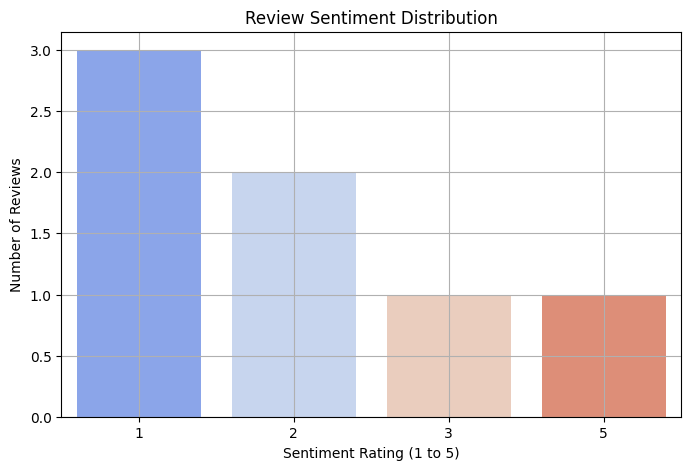

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title('Review Sentiment Distribution')
plt.xlabel('Sentiment Rating (1 to 5)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

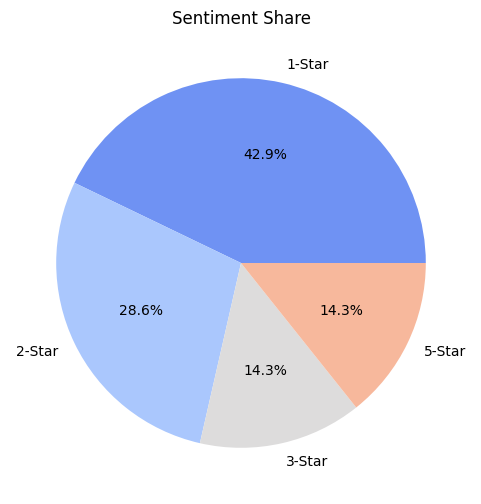

In [ ]:
plt.figure(figsize=(6, 6))
df['sentiment'].value_counts().sort_index().plot.pie(
    autopct='%1.1f%%',
    labels=[f'{i}-Star' for i in sorted(df["sentiment"].unique())],
    colors=sns.color_palette('coolwarm', n_colors=5)
)
plt.title('Sentiment Share')
plt.ylabel('')
plt.show()